The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



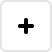
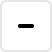
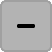
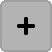
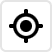
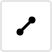
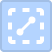
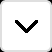
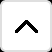
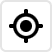
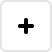
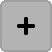
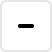
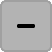
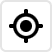
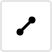
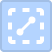
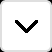
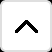
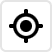

In [1]:
from lets_plot import *
from lets_plot.bistro import *
from scipy.stats import multivariate_normal
from lets_plot.geo_data import *
import pandas as pd
import numpy as np
LetsPlot.setup_html()

In [2]:
path_df = {
    'x': [None, None, 0.0, None, 1.0, 2.0, None, 4.0,  5.0, 6.0],
    'y': [None, 0.0,  0.5, 0.0,  0.0, 1.0, None, None, 0.5, 1.0],
    'c': [1,    2,    3,   4,    5,   6,   7,    8,    9,   10]
}

In [3]:
ggplot(path_df, aes('x','y')) + geom_line()

In [4]:
ggplot(path_df, aes('x','y')) + geom_line() + coord_polar()

In [5]:
ggplot(path_df, aes("x", "y", color="c")) + geom_path(size=3) + geom_point(color="red")

In [6]:
df = pd.DataFrame(path_df)
df['xend'] = df['x'].shift(-1)
df['yend'] = df['y'].shift(-1)

ggplot(df, aes(x='x', y='y', xend='xend', yend='yend', color='c')) + geom_segment(size=2)

In [7]:
ggplot(path_df, aes('x', 'y')) + geom_line()

In [8]:
ggplot(path_df, aes("x", y="c")) + geom_area(stat="identity")

In [9]:
ribbon_df = {
    'x':    [None, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
    'ymin': [None, 0.0, 0.3, None, 0.2, None, 0.4, 0.6],
    'ymax': [None, 0.5, 0.8, None, 0.7, 0.9, None, 1.0],
}

In [10]:
ggplot(ribbon_df) + geom_ribbon(aes(x='x', ymin='ymin', ymax='ymax'))

In [11]:
ridges_df = {
    'x': [None, -1, -0.5, 0.0, 0.5, 1.0,   None,   -1, -0.5, 0.0, None, 0.5, 1.0,  2.0],
    'g': ['A',   'A', 'A',  'A', 'A', 'A', 'A',    'B', 'B',  'B', 'B',  'B', 'B', 'B'],
    'h': [None,  0.0, 0.6,  1.0, 0.6, 0.0, None,   0.0, 0.5,  0.8, None, 0.4, 0.0, 0.0]
}

In [12]:
ggplot(ridges_df, aes('x', 'g', height='h', group='g')) + geom_area_ridges(stat='identity')

In [13]:
smooth_df = {
    'x': [None, -2,  -1,   0,   1,   2,  None,  3,   4,   5,  None,  6],
    'y': [None,  1.5, 0.5, 0.0, 0.6, 1.0, None, 1.2, 1.0, 0.8, None, 0.7]
}

In [14]:
ggplot(smooth_df, aes('x', 'y')) + geom_smooth(method='loess') + geom_point()

In [15]:
violin_df = {
    'y':   [0.3,   None,0.2,0.5,0.8,  None,0.4,0.6,  0.1, None,0.9, 0.7]
}

In [16]:
ggplot(violin_df, aes(y = 'y')) + geom_violin()

In [17]:
step_df = {
    'x': [None, 0, 1, None, 2, 3, 4, None, 5, 6],
    'y': [None, 0, 1, None, None, 0.6, None, 0.9, 0.9, 1.0],
    'c': [1,    2,    3,   4,    5,   6,   7,    8,    9,   10]
}

In [18]:
ggplot(step_df, aes('x', 'y', color='c')) + geom_step(size=3)

In [19]:
polygon_df = {    
    'x': [None, 0, 1, 1, 0,    2, 3, None, None,    4, 5, None, 5, 4],
    'y': [None, 0, 0, 1, 1,    0, 0, 1,    1,       0, 0.5, None, 1, 1],
    'id': ['A','A','A','A','A', 'B','B','B','B',   'C','C','C','C','C']
}

In [20]:
ggplot(polygon_df, aes('x','y', group='id', color='id', fill='id')) + geom_polygon(size=5) + scale_fill_hue()

In [21]:
contour_df = {
    'x': [0,1,2,3,4,  0,1,2,3,4,  0,1,2,3,4,  0,1,2,3,4,  0,1,2,3,4],
    'y': [0,0,0,0,0,  1,1,1,1,1,  2,2,2,2,2,  3,3,3,3,3,  4,4,4,4,4],
    'z': [0,1,4,9,16,   1,2,None,10,17,   4,None,None,None,20,   9,10,None,18,25,   16,17,20,25,32]
}
contour_df2 = {
    'x': [0,1,2,3,4,  0,1,2,3,4,  0,1,2,3,4,  0,1,2,3,4,  0,1,2,3,4],
    'y': [0,0,0,0,0,  1,1,1,1,1,  2,2,2,2,2,  3,3,3,3,3,  4,4,4,4,4],
    'z': [0,1,4,9,16, 1,2,5,10,17,4,5,8,13,20,   9,10,13,18,25,   16,17,20,25,32]
}

In [22]:
ggplot(contour_df2, aes('x', 'y', z='z')) + geom_contour(bins=6)

In [23]:
n = 25
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
X, Y = np.meshgrid(x, y)
mean = np.zeros(2)
cov = [[1, .5],
      [.5, 1]]
rv = multivariate_normal(mean, cov)
Z = rv.pdf(np.dstack((X, Y)))
data = {'x': X.flatten(), 'y': Y.flatten(), 'z': Z.flatten()}

ggplot(data, aes(x='x', y='y', z='z')) + geom_contour()

In [24]:
density_df = {
    'x': [None, -3.0, -2.9, -2.8, None, -1.0, -1.0, -0.8, None, 0.5, 0.6, 0.7, None, 3.0, 10.0, None],
    'y': [None, 2,    3,    2,    None, 3,    None, 4,    5,    0,   1,   2,   3,    4,   1,    5]
}

In [25]:
ggplot(density_df, aes('x')) + geom_density()

In [26]:
ggplot(density_df, aes('x', 'y')) + geom_density(stat='identity')

In [27]:
ggplot(polygon_df, aes('x','y', group='id', color='id', fill='id')) + geom_map() + scale_fill_hue()

In [28]:
df = pd.DataFrame({
    'x': [0.0, 4.0, 1.0, 5.0, 2.0, 6.0, 3.0, 7.0],
    'y': [4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0],
    'x_na': [None, 4.0, 1.0, 5.0, 2.0, None, 3.0, 7.0],
    'y_na': [None, 4.0, 3.0, 3.0, 2.0, None, 1.0, 1.0],
    'c': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b']
})
line = ggplot(df, aes(x='x', y='y', color='c')) + geom_line(linewidth = 1) + ggtitle('geom_line')
line_x_na = ggplot(df, aes(x='x_na', y='y', color='c')) + geom_line(linewidth = 1) + ggtitle('geom_line NA in x')
line_y_na = ggplot(df, aes(x='x', y='y_na', color='c')) + geom_line(linewidth = 1) + ggtitle('geom_line NA in y')
path = ggplot(df, aes(x='x', y='y', color='c')) + geom_path(linewidth = 1) + ggtitle('geom_path')
path_x_na = ggplot(df, aes(x='x_na', y='y', color='c')) + geom_path(linewidth = 1) + ggtitle('geom_path NA in x')
path_y_na = ggplot(df, aes(x='x', y='y_na', color='c')) + geom_path(linewidth = 1) + ggtitle('geom_path NA in y')
step = ggplot(df, aes(x='x', y='y', color='c')) + geom_step(linewidth = 1) + ggtitle('geom_step')
step_x_na = ggplot(df, aes(x='x_na', y='y', color='c')) + geom_step(linewidth = 1) + ggtitle('geom_step NA in x')
step_y_na = ggplot(df, aes(x='x', y='y_na', color='c')) + geom_step(linewidth = 1) + ggtitle('geom_step NA in y')

In [29]:
gggrid([line, line_x_na, line_y_na])

In [30]:
gggrid([path, path_x_na, path_y_na])

In [31]:
gggrid([step, step_x_na, step_y_na])